In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.style.available
plt.style.use('ggplot')
from sklearn.utils import resample
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, BatchNormalization

## Bigger data - deeper networks

The last exercise gave us an intro into how to build and tune some of the parameters of a neural network. Now we move to an example where we have more data. Generally as we increase the amount of training data we can make use of deeper networks, with more layers to give more accurate predictions.

This time around we load up the data from `ag-muon-data-tight.pkl`

You can load this up in the same way as in the previous notebook. We just take the first 50k examples to speed up training.

In [8]:
df = pd.read_pickle('ag-muon-data-tight.pkl').iloc[:90000]
X = np.array(df[3].to_list())
y = np.array(df[1].to_list())

## Class imbalance 
Don't forget to take care of class balance in your dataset. Do the same checks and use the `resample` function as you did in the previous notebook. Plot a historgram of the class balance.

(array([32196.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32196.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

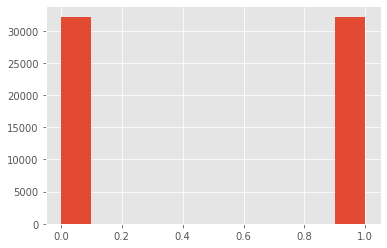

In [9]:
num_ag = np.count_nonzero(y==0)
num_no_ag = np.count_nonzero(y==1)

df_majority = df[df[1]==0]
df_minority = df[df[1]==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=num_no_ag,     # to match minority class
                                 random_state=123) # reproducible results

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_new = df_downsampled.sample(frac=1)

X = np.array(df_new[3].to_list())
y = np.array(df_new[1].to_list())
plt.hist(y)

### Initial network

We now have more data, so we could think about making a deeper network. Try out the architecture below. **Note** this needs to run for more epochs as the network takes some time to equilibrate, so a little bit of patience is needed. If you like you can try stopping it earlier (running fewer epochs), then plot the training and validation loss to see how it is doing.

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
ad = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=ad, metrics=['accuracy'])
history_bn = model.fit(X, y, epochs=200, batch_size=64, validation_split=0.2)

Train on 51513 samples, validate on 12879 samples
Epoch 1/200
51513/51513 [==============================] - 5s 96us/sample - loss: 0.6937 - accuracy: 0.5200 - val_loss: 0.6869 - val_accuracy: 0.5460
Epoch 2/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.6735 - accuracy: 0.5859 - val_loss: 0.7268 - val_accuracy: 0.5004
Epoch 3/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.5512 - accuracy: 0.7317 - val_loss: 0.7137 - val_accuracy: 0.6094
Epoch 4/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.3068 - accuracy: 0.8824 - val_loss: 0.4886 - val_accuracy: 0.7499
Epoch 5/200
51513/51513 [==============================] - 4s 85us/sample - loss: 0.1323 - accuracy: 0.9593 - val_loss: 0.6370 - val_accuracy: 0.7417
Epoch 6/200
51513/51513 [==============================] - 4s 84us/sample - loss: 0.0916 - accuracy: 0.9687 - val_loss: 0.5184 - val_accuracy: 0.7741
Epoch 7/200
51513/51513 [=========================

Epoch 55/200
51513/51513 [==============================] - 4s 86us/sample - loss: 0.0371 - accuracy: 0.9865 - val_loss: 0.1632 - val_accuracy: 0.9404
Epoch 56/200
51513/51513 [==============================] - 4s 86us/sample - loss: 0.0380 - accuracy: 0.9859 - val_loss: 0.1845 - val_accuracy: 0.9426
Epoch 57/200
51513/51513 [==============================] - 4s 87us/sample - loss: 0.0361 - accuracy: 0.9861 - val_loss: 0.0624 - val_accuracy: 0.9779
Epoch 58/200
51513/51513 [==============================] - 5s 89us/sample - loss: 0.0378 - accuracy: 0.9862 - val_loss: 0.1634 - val_accuracy: 0.9495
Epoch 59/200
51513/51513 [==============================] - 5s 90us/sample - loss: 0.0360 - accuracy: 0.9865 - val_loss: 0.1106 - val_accuracy: 0.9601
Epoch 60/200
51513/51513 [==============================] - 4s 86us/sample - loss: 0.0344 - accuracy: 0.9877 - val_loss: 0.0704 - val_accuracy: 0.9751
Epoch 61/200
51513/51513 [==============================] - 4s 86us/sample - loss: 0.0336 - ac

51513/51513 [==============================] - 4s 86us/sample - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.1137 - val_accuracy: 0.9713
Epoch 110/200
51513/51513 [==============================] - 4s 86us/sample - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.1042 - val_accuracy: 0.9706
Epoch 111/200
51513/51513 [==============================] - 4s 84us/sample - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.1162 - val_accuracy: 0.9675
Epoch 112/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.7273 - val_accuracy: 0.8673
Epoch 113/200
51513/51513 [==============================] - 4s 85us/sample - loss: 0.0132 - accuracy: 0.9953 - val_loss: 1.2048 - val_accuracy: 0.7687
Epoch 114/200
51513/51513 [==============================] - 4s 84us/sample - loss: 0.0138 - accuracy: 0.9946 - val_loss: 0.2513 - val_accuracy: 0.9327
Epoch 115/200
51513/51513 [==============================] - 4s 85us/sample - loss: 0.0141 - accuracy:

Epoch 163/200
51513/51513 [==============================] - 4s 84us/sample - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.1509 - val_accuracy: 0.9648
Epoch 164/200
51513/51513 [==============================] - 4s 82us/sample - loss: 0.0085 - accuracy: 0.9968 - val_loss: 0.1254 - val_accuracy: 0.9702
Epoch 165/200
51513/51513 [==============================] - 4s 85us/sample - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.1149 - val_accuracy: 0.9732
Epoch 166/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.2015 - val_accuracy: 0.9602
Epoch 167/200
51513/51513 [==============================] - 4s 85us/sample - loss: 0.0101 - accuracy: 0.9963 - val_loss: 0.1770 - val_accuracy: 0.9647
Epoch 168/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.1656 - val_accuracy: 0.9647
Epoch 169/200
51513/51513 [==============================] - 4s 83us/sample - loss: 0.00

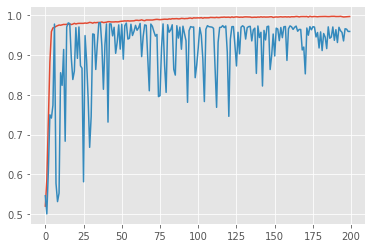

In [11]:
plt.plot(history_bn.history['accuracy'])
plt.plot(history_bn.history['val_accuracy'])